In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
#exchange_rates.info()

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
 'Period\\Unit:': 'Time'},
 inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters


-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.1159     1
1.1654     1
1.4199     1
0.8813     1
1.2685     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


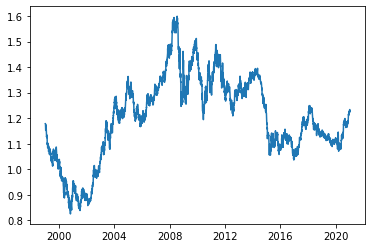

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()


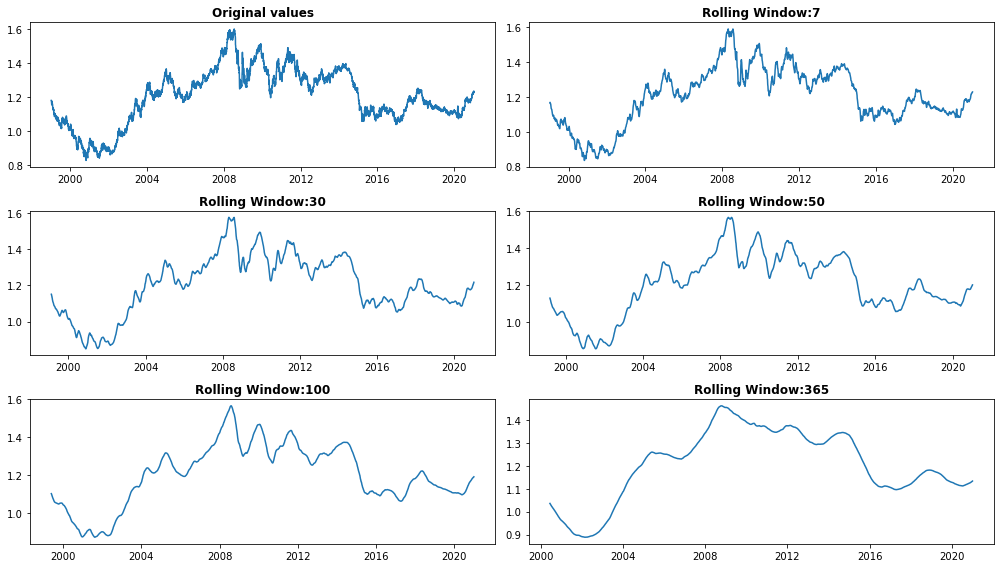

In [8]:
plt.figure(figsize=(14,8))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')
for i, rolling_mean in zip([2, 3, 4, 5, 6],
 [7, 30, 50, 100, 365]):
 plt.subplot(3,2,i)
 plt.plot(euro_to_dollar['Time'],
 euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
 plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
 
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()


In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

### Coming up with an Idea

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data
as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack
Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot

In [10]:
financial_crisis = euro_to_dollar.copy(
 )[(euro_to_dollar['Time'].dt.year >= 2006
 ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
 )[(euro_to_dollar.Time.dt.year >= 2007
 ) & (euro_to_dollar.Time.dt.year <= 2008)]


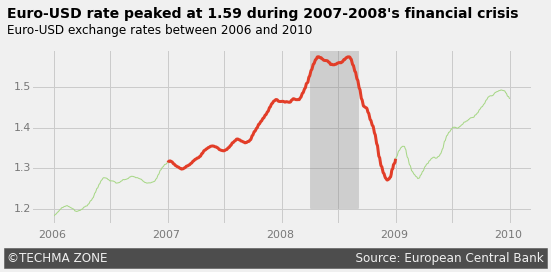

In [11]:
import matplotlib.style as style
style.use('fivethirtyeight')
### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
 financial_crisis['rolling_mean'],
 linewidth=1, color='#A6D785')
### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
 financial_crisis_7_8['rolling_mean'],
 linewidth=3, color='#e23d28')
# print(ax.set_xticklabels(["2006", "", "2007", "", "2008", "", "2009", "", "2010"], alpha = 0.3))
ax.set_xticklabels([])
x = 13100.0
for year in ['2006', '2007', '2008', '2009', '2010']:
 ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
 x += 365
 
# print(plt.yticks())
ax.set_yticklabels([])
y = 1.193 
for rate in ['1.2', '1.3', '1.4', '1.5']:
 ax.text(13020.0, y, rate, alpha=0.5, fontsize=11)
 y += 0.1
 
## Adding a title and a subtitle 
ax.text(13000.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
 weight="bold")
ax.text(13000.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
 size=12)
### Adding a signature
ax.text(13000.0, 1.07, '©TECHMA ZONE' + ' '*64 + 'Source: European Central Bank',
 color = '#f0f0f0', backgroundcolor = '#4d4d4d',
 size=12)
ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"), ymin=0.09,
 alpha=0.3, color='grey')
plt.show()


In [12]:
bush_obama_trump = euro_to_dollar.copy(
 )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
 )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
 )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
 )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

<ipython-input-13-ffcadd40158d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
<ipython-input-13-ffcadd40158d>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
<ipython-input-13-ffcadd40158d>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
<ipython-input-13-ffcadd40158d>:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


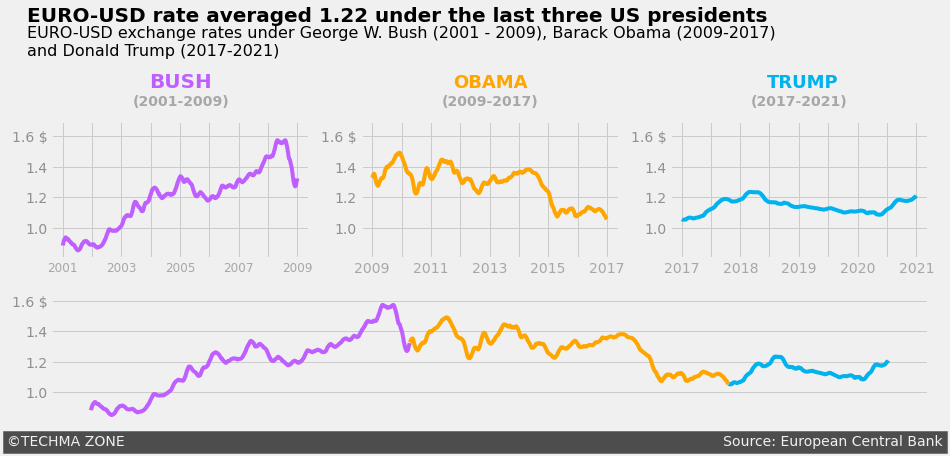

In [13]:
## Adding the FiveThirtyEight style
style.use('fivethirtyeight')
### Adding the subplots
plt.figure(figsize=(14, 8))
# pattern 1
ax1 = plt.subplot(3,3,1) # row, col, index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
# pattern 2
ax4 = plt.subplot(3,1,2) # row, col, index
axes = [ax1, ax2, ax3, ax4]
### Changes to all the subplots
for ax in axes:
 ax.set_ylim(0.8, 1.7)
 ax.set_yticks([1.0, 1.2, 1.4, 1.6])
 ax.set_yticklabels(['1.0', '1.2','1.4', '1.6 $'],
 alpha=0.4)
 
 
### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
 color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
 '2007', '', '2009'],
 alpha=0.3, size = 12)
ax1.text(12400.0, 1.92, 'BUSH', fontsize=20, weight='bold',
 color='#BF5FFF')
ax1.text(12200.0, 1.8, '(2001-2009)', weight='bold',
 alpha=0.3)
### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
 color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
 '2015', '', '2017'],
 alpha=0.3)
ax2.text(15256.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
 color='#ffa500')
ax2.text(15106.0, 1.8, '(2009-2017)', weight='bold',
 alpha=0.3)
### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
 color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
 '2020', '', '2021'],
 alpha=0.3)
ax3.text(17697.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
 color='#00B2EE')
ax3.text(17597.0, 1.8, '(2017-2021)', weight='bold',
 alpha=0.3)
### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
 color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
 color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
 color='#00B2EE')
ax4.set_xticks([])
### Adding a title and a subtitle
ax1.text(10879.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
 fontsize=20, weight='bold')
ax1.text(10879.0, 2.13, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017)
and Donald Trump (2017-2021)''',
 fontsize=16)
### Adding a signature
ax4.text(10557.0, 0.65, '©TECHMA ZONE' + ' '*133 + 'Source: European Central Bank',
 color = '#f0f0f0', backgroundcolor = '#4d4d4d',
 size=14)
plt.tight_layout()